In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

sns.set_theme()

In [36]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [37]:
THESIS_DIR = os.path.join(os.environ["HOME"], "Documents", "Studie", "Thesis", "Report", "thesis", "src")

if not(os.path.exists(THESIS_DIR)):
    raise Error("Set the correct thesis root dir to save results to!")

THESIS_FIGURE_DIR = os.path.join(THESIS_DIR, "fig")
THESIS_TABLE_DIR = os.path.join(THESIS_DIR, "tab")

os.makedirs(THESIS_FIGURE_DIR, exist_ok=True)
os.makedirs(THESIS_TABLE_DIR, exist_ok=True)

In [38]:
# Load data
results_files = [
    "20211014-124146 -p optimisationLevel=4 -f 2 -wi 2 -i 3 run.csv",
    "20211013-114213_results-compilespace.csv"
#     "20211013-114213_results-compilespace.csv"
#     "20211013-124531-benchnullary.csv"
#     "20211012-102647.csv"
#     "20211007-135249.csv",
#     "20211007-084741.csv", # benchsym switch backend
#     "20211006-143434.csv", # more problem swtich backend
#     "20210915-111700.csv",
#     "results-compilespace.csv",
]

df_raw = pd.concat(map(lambda f: pd.read_csv(f"results/{f}"), results_files), ignore_index=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Benchmark                    1675 non-null   object 
 1   Mode                         201 non-null    object 
 2   Threads                      201 non-null    float64
 3   Samples                      201 non-null    float64
 4   Score                        1675 non-null   float64
 5   Score Error (99.9%)          201 non-null    float64
 6   Unit                         201 non-null    object 
 7   Param: metaborgVersion       201 non-null    object 
 8   Param: optimisationLevel     1675 non-null   int64  
 9   Param: problemSize           1675 non-null   int64  
 10  Param: sharedConstructors    201 non-null    object 
 11  Param: switchImplementation  1407 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 157.2+ KB


In [39]:
for col in ["Score", "Score Error (99.9%)"]:
    if col in df_raw and df_raw[col].dtype == object:
        df_raw[col] = df_raw[col].map(lambda s: s.replace(',', '.'), na_action="ignore").astype(float)

# df_raw

In [40]:
df_raw["Param: optimisationLevel"] = df_raw["Param: optimisationLevel"].astype("string")

In [41]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Param: sharedConstructors,Param: switchImplementation
0,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.420049,0.192166,s/op,2.6.0-SNAPSHOT,4,100,on,elseif
1,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.441973,0.080040,s/op,2.6.0-SNAPSHOT,4,100,on,nested-switch
2,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.435780,0.056236,s/op,2.6.0-SNAPSHOT,4,100,on,hash-switch
3,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.411708,0.171513,s/op,2.6.0-SNAPSHOT,4,200,on,elseif
4,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.419544,0.156823,s/op,2.6.0-SNAPSHOT,4,200,on,nested-switch
...,...,...,...,...,...,...,...,...,...,...,...,...
1670,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,128077.000000,NaN,NaN,NaN,4,100,NaN,elseif
1671,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,131994.000000,NaN,NaN,NaN,4,100,NaN,nested-switch
1672,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,134389.000000,NaN,NaN,NaN,4,100,NaN,nested-switch
1673,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,128094.000000,NaN,NaN,NaN,4,100,NaN,hash-switch


In [42]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Problem"] = df["Benchmark"].str.split('.').map(lambda l: l[-2])
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Param: sharedConstructors,Param: switchImplementation,Stage,Problem
0,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.420049,0.192166,s/op,2.6.0-SNAPSHOT,4,100,on,elseif,run,BenchNullary
1,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.441973,0.080040,s/op,2.6.0-SNAPSHOT,4,100,on,nested-switch,run,BenchNullary
2,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.435780,0.056236,s/op,2.6.0-SNAPSHOT,4,100,on,hash-switch,run,BenchNullary
3,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.411708,0.171513,s/op,2.6.0-SNAPSHOT,4,200,on,elseif,run,BenchNullary
4,benchmark.stratego2.execution.BenchNullary.run,ss,1.0,6.0,0.419544,0.156823,s/op,2.6.0-SNAPSHOT,4,200,on,nested-switch,run,BenchNullary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,128077.000000,NaN,NaN,NaN,4,100,NaN,elseif,Java space,Sieve
1671,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,131994.000000,NaN,NaN,NaN,4,100,NaN,nested-switch,Class space,Sieve
1672,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,134389.000000,NaN,NaN,NaN,4,100,NaN,nested-switch,Java space,Sieve
1673,benchmark.stratego2.compilation.stratego.Sieve...,NaN,NaN,NaN,128094.000000,NaN,NaN,NaN,4,100,NaN,hash-switch,Class space,Sieve


In [43]:
program_text = """
module calls

imports libstrategolib

signature

sorts
   S

constructors
   nullary_constructor : S 
   unary_constructor : S -> S 
   nary_constructor : S * S * S -> S 
   nullary_function : S 
   unary_function : S -> S 
   nary_function : S * S * S -> S 
   a : S 
   b : S 
   c : S 
   d : S 
   e : S 
   f : S 

rules
   REC_E: nullary_function() -> nullary_constructor()
   REC_E: unary_function (x) -> unary_constructor (x)
   REC_E: nary_function (x, y, z) -> nary_constructor (x, y, z)
   REC_E: a() -> nullary_constructor()
   REC_E: b() -> unary_constructor (nullary_constructor())
   REC_E: c() -> nary_constructor (nullary_constructor(), nullary_constructor(), nullary_constructor())
   REC_E: d() -> nullary_function()
   REC_E: e() -> unary_function (nullary_function())
   REC_E: f() -> nary_function (nullary_function(), nullary_function(), nullary_function())

strategies
   eval = memo (innermost (REC_E))
   eval-and-print = eval ; debug (!"result = ")
   main = 
      (<eval-and-print> nullary_constructor()) ;
      (<eval-and-print> unary_constructor (nullary_constructor())) ;
      (<eval-and-print> nary_constructor (nullary_constructor(), nullary_constructor(), nullary_constructor())) ;
      (<eval-and-print> nullary_function()) ;
      (<eval-and-print> unary_function (nullary_function())) ;
      (<eval-and-print> nary_function (nullary_function(), nullary_function(), nullary_function())) ;
      <exit> 0

"""

In [44]:
df["Param: problemSize"].astype("str").mask(df["Param: problemSize"]==-1, "")

0       100
1       100
2       100
3       200
4       200
       ... 
1670    100
1671    100
1672    100
1673    100
1674    100
Name: Param: problemSize, Length: 1675, dtype: object

In [45]:
import re
import os

# Add number of unique constructors to problems
# cons_regex_pat = r"\bconstructors\b\W*(?:\s*(\w*)\s*:.*\s*)*\W*\brules\b"

cons_area_regex = r"^\s*constructors\s*$((?:.*\n)*)^\s*rules\s*$"
cons_area_pat = re.compile(cons_area_regex, re.MULTILINE)

cons_regex = r"\w+\s*:.*\S"
cons_pat = re.compile(cons_regex)

def find_constructors(p):
    cons_areas = cons_area_pat.findall(p)
    cons_groups = list(map(cons_pat.findall, cons_areas))
    conses = set().union(*cons_groups)
    return conses

def count_constructors_in_file(program_name):
    p_program = os.path.join("..", "src", "main", "resources", program_name + ".str2")
    with open(p_program, 'r') as f_program:
        contents = f_program.read()
        conses = find_constructors(contents)
        return len(conses)

df["Number of constructors"] = (df["Problem"].str.lower() + df["Param: problemSize"].astype("str").mask(df["Param: problemSize"]==-1, "")).map(count_constructors_in_file)

In [46]:
## Plot-specific settings
configs = [
    {
        "problems": {"Benchexpr", "Benchsym", "Benchtree", "Bubblesort", "Factorial", "Fibonacci", "Hanoi", "Mergesort", "Quicksort", "Sieve"},
        "stages": {"run"},
        "settings": {"yscale": "log"}
    },
    {
        # Apply to all problems
        "stages": {"compileStratego", "compileJava", "Java space", "Class space"},
        "settings": {"ylim": (0, None)}
    },
    {
        "stages": {"Java space", "Class space"},
        "settings": {"ylabel": "Size (bytes)"}
    }
]

In [47]:
from pandas.core.common import flatten

def configure_grid(g: sns.FacetGrid, problem=None):
    ## Global settings
    g.set_ylabels("Time (s)")
    g.set_xlabels("Input size")

    for ax in flatten(g.axes):
        ax.get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

    # Specific settings
    try:
        for (row_val, col_val), ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or row_val in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    except (ValueError):
        for col_val, ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or problem in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    finally:
        return g

In [61]:
df_scaledproblem = df[(df["Param: problemSize"] != -1) & (df["Problem"] != "BenchNullary")]

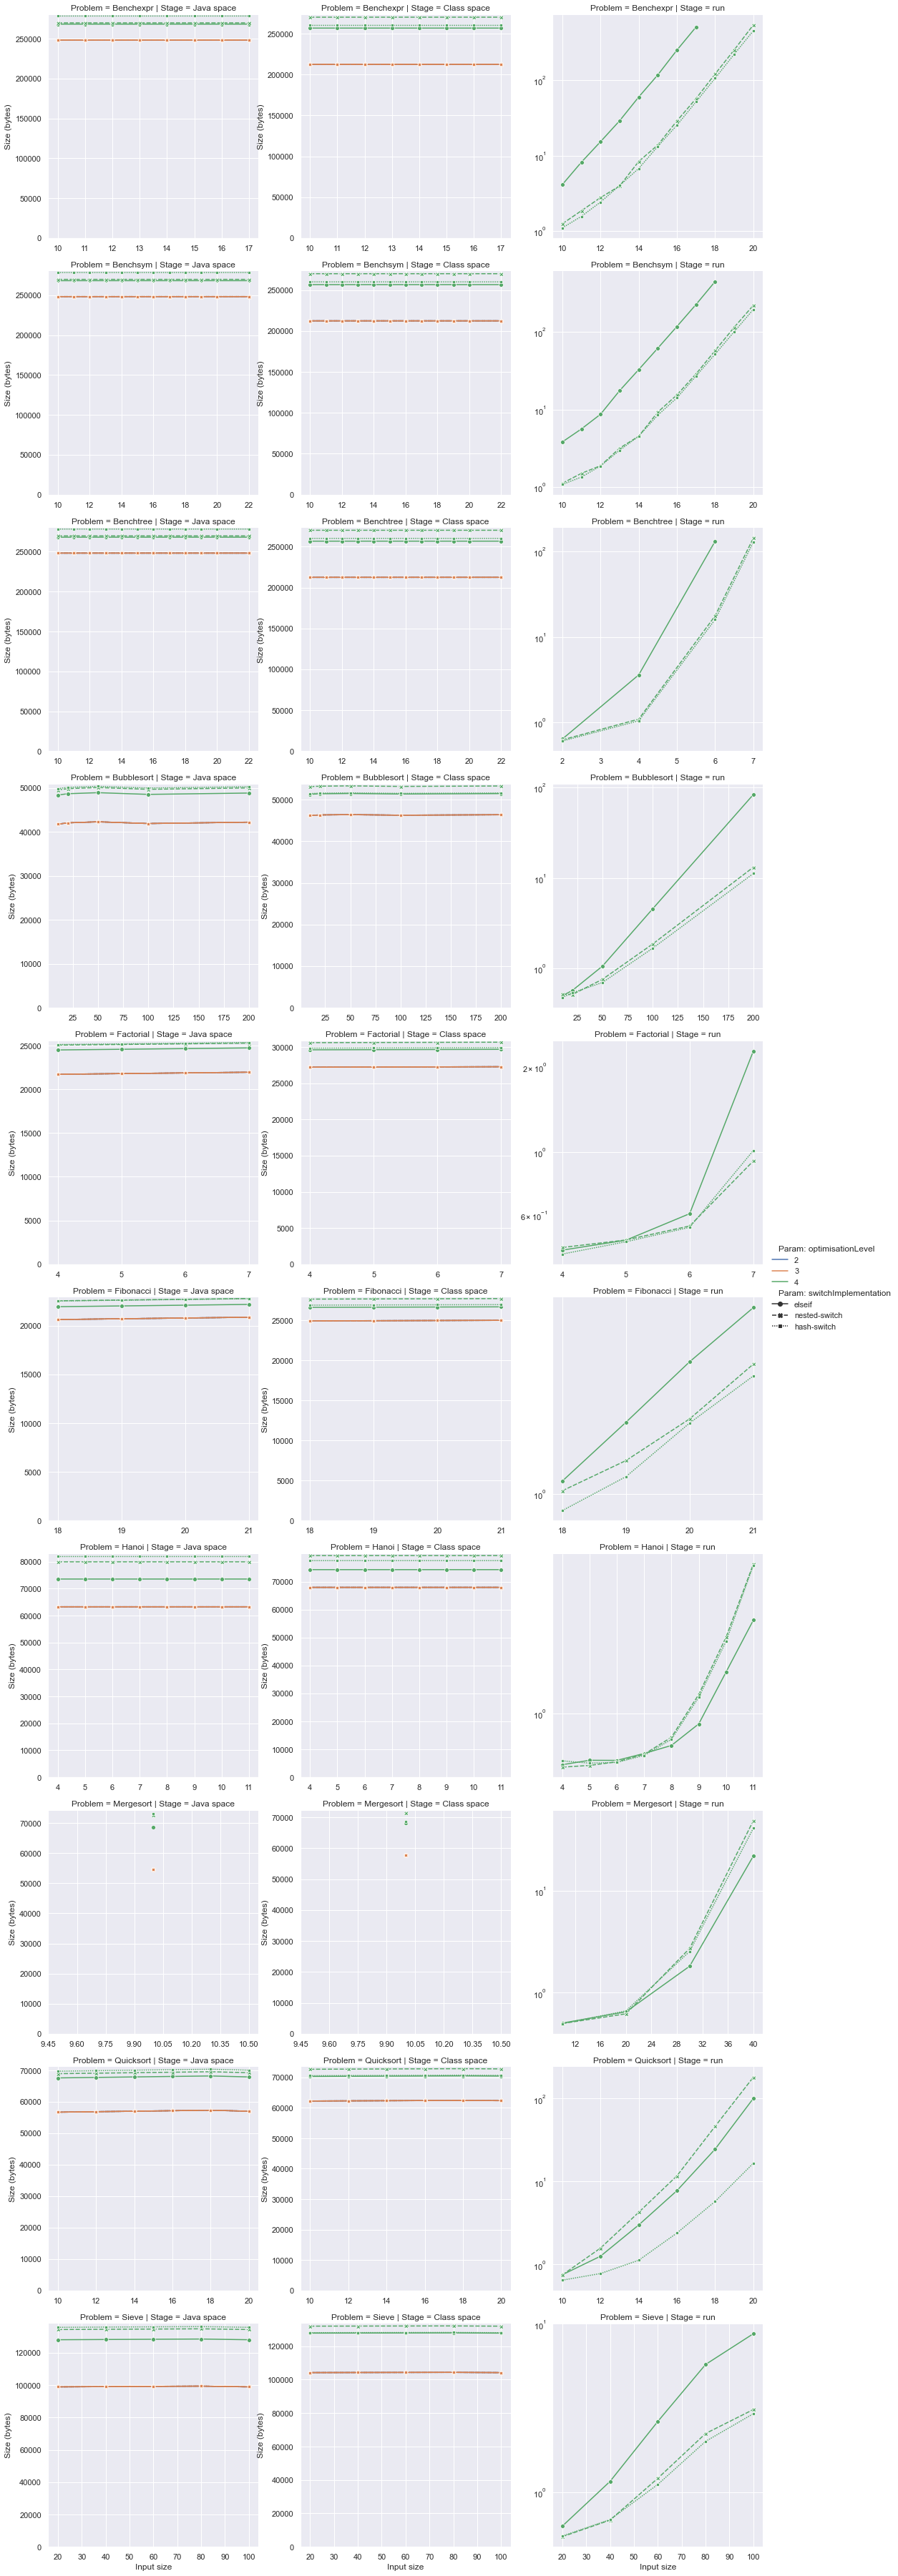

In [62]:
g = configure_grid(sns.relplot(
    data=df_scaledproblem,
    x="Param: problemSize",
    y="Score",
    row="Problem",
    row_order=np.sort(np.unique(df_scaledproblem["Problem"].values)),
    col="Stage",
    col_order=[s for s in ["compileStratego", "Java space", "compileJava", "Class space", "run"] if s in df_scaledproblem["Stage"].values],
    style="Param: switchImplementation",
    hue="Param: optimisationLevel",
    hue_order=["2", "3", "4"],
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-allstages.png")

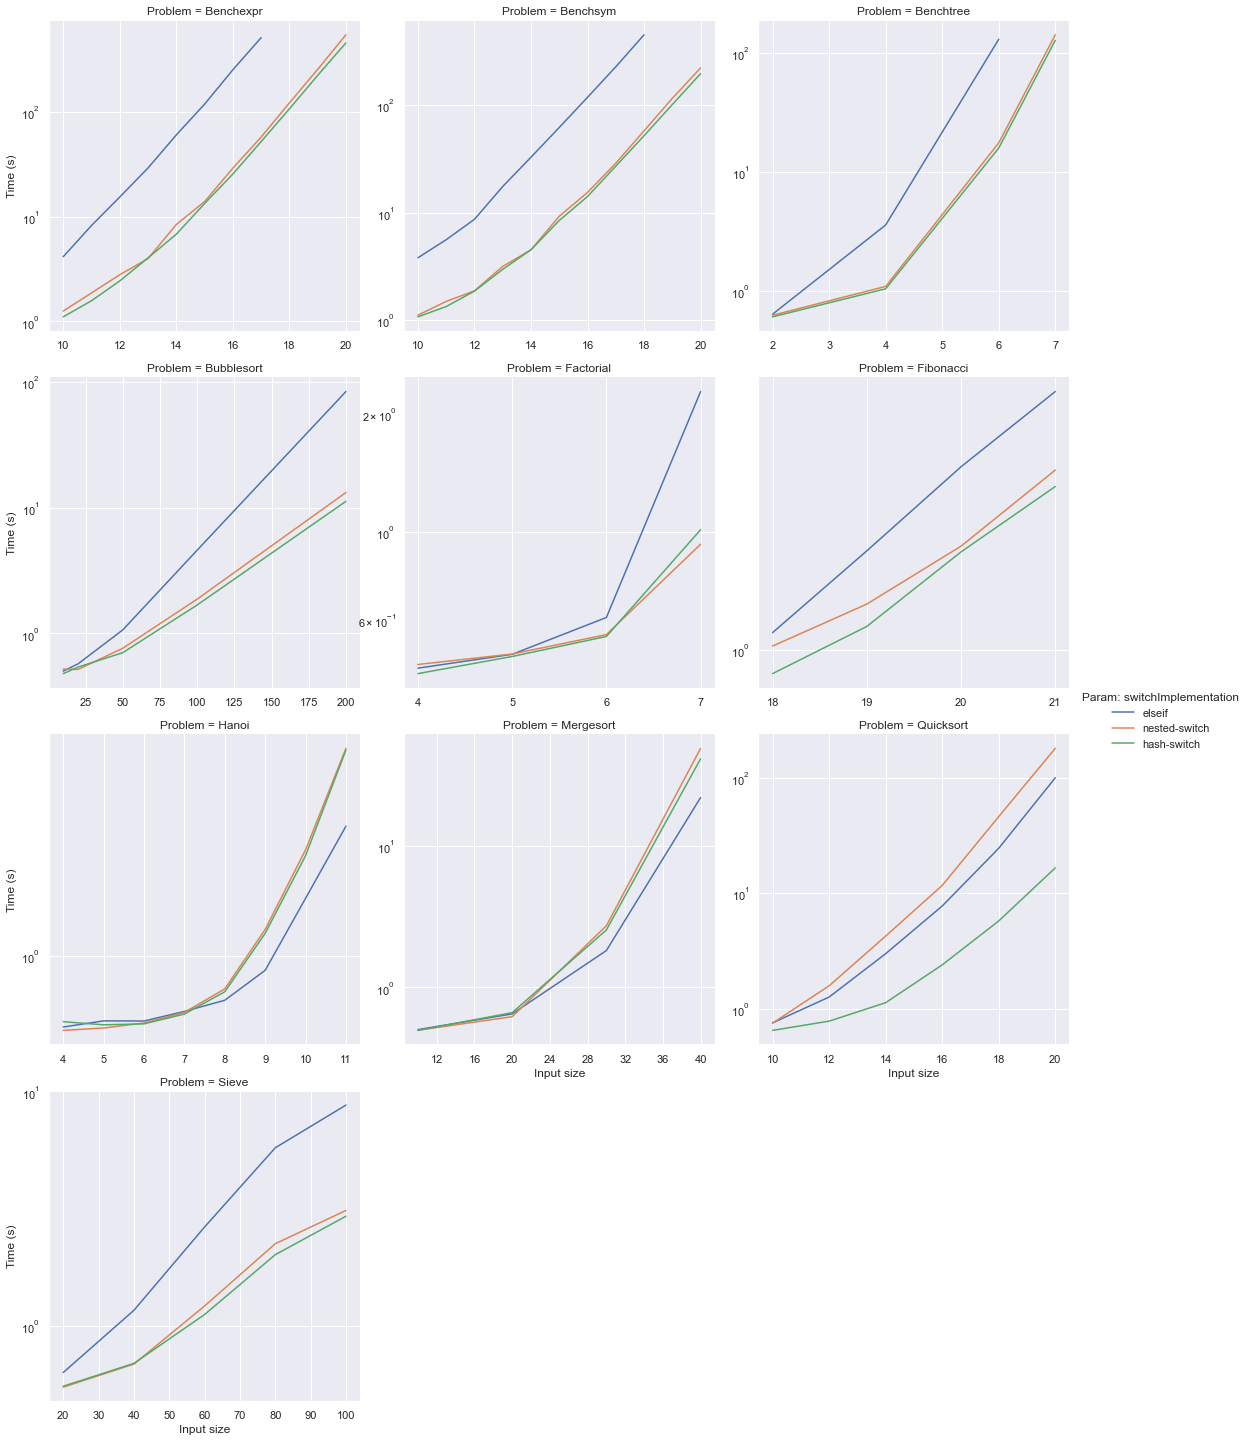

In [64]:
# Runtimes for DFA switch backends (per problem)

cols = np.sort(np.unique(df_scaledproblem["Problem"].values))

g = configure_grid(sns.relplot(
    data=df_scaledproblem[df_scaledproblem["Stage"] == "run"],
    x="Param: problemSize",
    y="Score",
    col="Problem",
    col_order=cols,
    col_wrap=min(3, len(cols)),
#     style="Param: switchImplementation",
    hue="Param: switchImplementation",
#     hue_order=["2", "3", "4"],
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(yscale="log")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-runtime.png")

In [65]:
df_ratios = df[df["Stage"] == "run"].pivot(index=["Param: switchImplementation"], columns=["Benchmark", "Param: problemSize", "Number of constructors", "Problem"], values="Score").T

# df_ratios["Ratio"] = df_ratios["elseif"] / df_ratios["switch"]
df_ratios["Ratio [nested]"] = df_ratios["nested-switch"] / df_ratios["elseif"]
df_ratios["Ratio [hash]"] = df_ratios["hash-switch"] / df_ratios["elseif"]

df_ratios.sort_values("Ratio [hash]")

# df_ratios.columns.to_series().apply(''.join)

# df[df[""]]

Param: switchImplementation                                                                          elseif  \
Benchmark                                   Param: problemSize Number of constructors Problem                 
benchmark.stratego2.execution.Benchexpr.run 16                 92                     Benchexpr  251.183826   
                                            17                 92                     Benchexpr  508.510031   
                                            15                 92                     Benchexpr  118.115021   
                                            14                 92                     Benchexpr   60.104873   
benchmark.stratego2.execution.Benchsym.run  18                 92                     Benchsym   447.150084   
...                                                                                                     ...   
benchmark.stratego2.execution.Benchexpr.run 19                 92                     Benchexpr         NaN   
                                            20                 92                     Benchexpr         NaN   
benchmark.stratego2.execution.Benchsym.run  19                 92                     Benchsym          NaN   
                                            20                 92                     Benchsym          NaN   
benchmark.stratego2.execution.Benchtree.run 7                  92                     Benchtree         NaN   

Param: switchImplementation                                                                      hash-switch  \
Benchmark                                   Param: problemSize Number of constructors Problem                  
benchmark.stratego2.execution.Benchexpr.run 16                 92                     Benchexpr    25.446624   
                                            17                 92                     Benchexpr    51.905155   
                                            15                 92                     Benchexpr    13.324704   
                                            14                 92                     Benchexpr     6.788525   
benchmark.stratego2.execution.Benchsym.run  18                 92                     Benchsym     51.713148   
...                                                                                                      ...   
benchmark.stratego2.execution.Benchexpr.run 19                 92                     Benchexpr   222.114089   
                                            20                 92                     Benchexpr   453.813821   
benchmark.stratego2.execution.Benchsym.run  19                 92                     Benchsym    100.728901   
                                            20                 92                     Benchsym    194.999778   
benchmark.stratego2.execution.Benchtree.run 7                  92                     Benchtree   128.307925   

Param: switchImplementation                                                                      nested-switch  \
Benchmark                                   Param: problemSize Number of constructors Problem                    
benchmark.stratego2.execution.Benchexpr.run 16                 92                     Benchexpr      28.969912   
                                            17                 92                     Benchexpr      57.297063   
                                            15                 92                     Benchexpr      13.897559   
                                            14                 92                     Benchexpr       8.404337   
benchmark.stratego2.execution.Benchsym.run  18                 92                     Benchsym       57.449583   
...                                                                                                        ...   
benchmark.stratego2.execution.Benchexpr.run 19                 92                     Benchexpr     253.403801   
                                            20                 92        

In [66]:
df_ratios_flat = df_ratios.melt(value_vars=["Ratio [hash]"], value_name="Ratio", ignore_index=False)
# df_ratios_flat.index = df_ratios_flat.index.to_flat_index()
# df_ratios_flat.reset_index()
df_ratios_flat.index

MultiIndex([(     'benchmark.stratego2.execution.BenchNullary.run', 100, ...),
            (     'benchmark.stratego2.execution.BenchNullary.run', 200, ...),
            (     'benchmark.stratego2.execution.BenchNullary.run', 300, ...),
            (     'benchmark.stratego2.execution.BenchNullary.run', 400, ...),
            (     'benchmark.stratego2.execution.BenchNullary.run', 500, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  10, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  11, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  12, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  13, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  14, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  15, ...),
            (        'benchmark.stratego2.execution.Benchexpr.run',  16, ...),
            (        'benchmark.stratego2.execution.

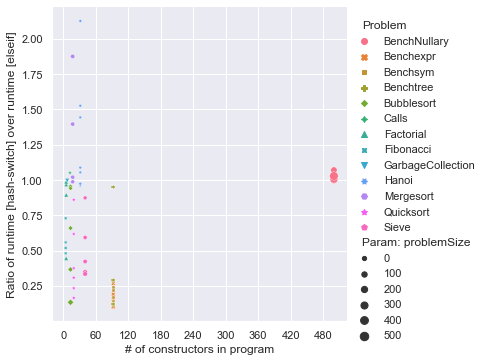

In [67]:
# Runtimes for DFA switch backends (against number of constructors)

g = configure_grid(sns.relplot(
    data=df_ratios,
    x="Number of constructors",
    y="Ratio [hash]",
    style="Problem",
    hue="Problem",
    size="Param: problemSize",
    kind="scatter",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

# g.set(yscale="log")
g.set_ylabels("Ratio of runtime [hash-switch] over runtime [elseif]")
g.set_xlabels("# of constructors in program")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-backend-constructors.png")

In [68]:
# g = sns.boxplot(
#     data=df_ratios,
#     x="Number of constructors",
#     y="Ratio",
#     hue="Problem"
# )

df_ratios.columns#.to_flat_index()
# df_ratios.columns.get_level_values(0) + '_' +  df_ratios.columns.get_level_values(1)

Index(['elseif', 'hash-switch', 'nested-switch', 'Ratio [nested]',
       'Ratio [hash]'],
      dtype='object', name='Param: switchImplementation')

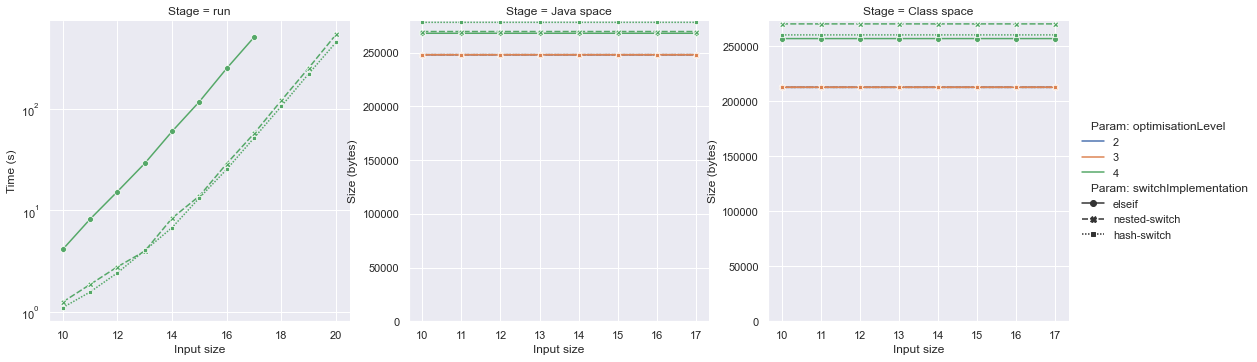

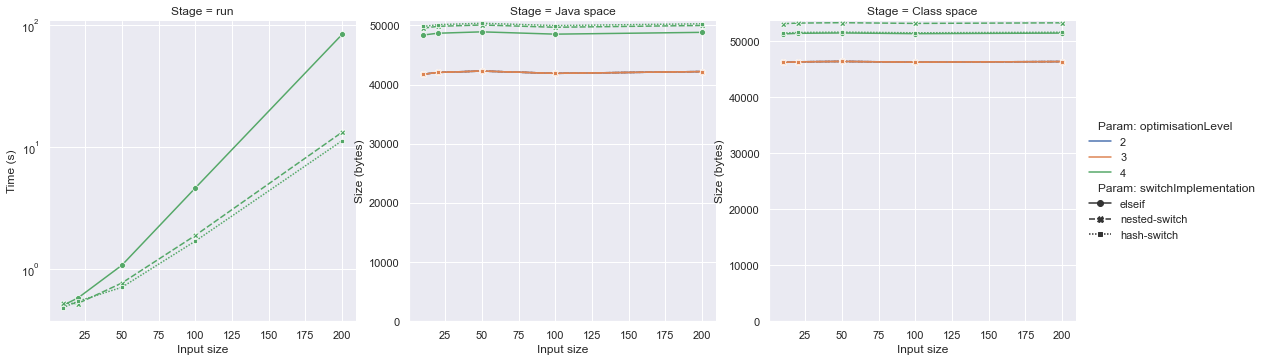

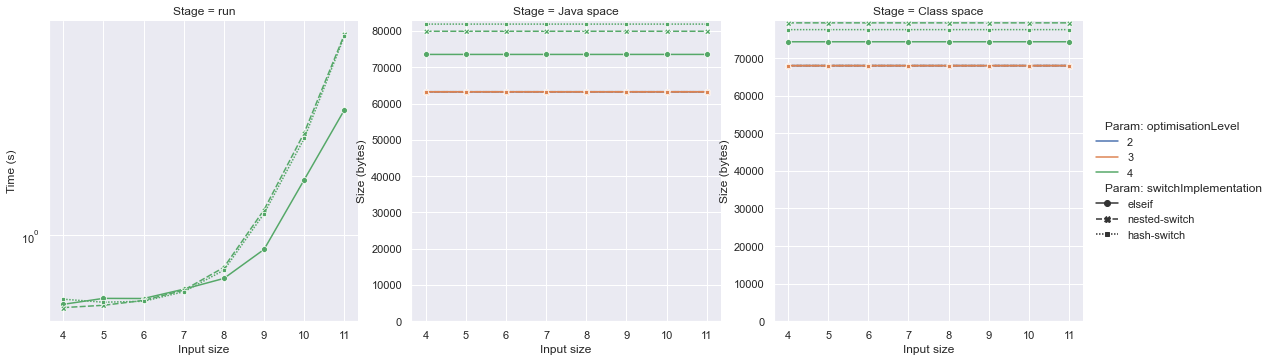

In [69]:
for problem in ["Benchexpr", "Bubblesort", "Hanoi"]:
    df_problem = df_scaledproblem[df_scaledproblem["Problem"] == problem]
    
    cols = [s for s in ["compileStratego", "compileJava", "run", "Java space", "Class space"] if s in df_problem["Stage"].values]

    g = configure_grid(sns.relplot(
        data=df_problem,
        x="Param: problemSize",
        y="Score",
#         row="Problem",
#         row_order=np.sort(np.unique(df_problem["Problem"].values)),
        col_wrap=min(3, len(cols)),
        col="Stage",
        col_order=cols,
        style="Param: switchImplementation",
        hue="Param: optimisationLevel",
        hue_order=[l for l in ["2", "3", "4"] if l in df_problem["Param: optimisationLevel"].values],
        kind="line",
    #     err_style="band",
        markers=True,
        facet_kws=dict(
            sharex=False, 
            sharey=False,
        ),
    ), problem)

    # Save figure to file
    plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-{problem}.png")

In [70]:
df_unscaledproblem = df[df["Param: problemSize"] == -1]

print(df_unscaledproblem.to_latex(
    columns=["Problem", "Stage", "Samples", "Score", "Score Error (99.9%)", "Param: optimisationLevel", "Param: switchImplementation"]
))

df_unscaledproblem

\begin{tabular}{lllrrrll}
\toprule
{} &            Problem &        Stage &  Samples &          Score &  Score Error (99.9\%) & Param: optimisationLevel & Param: switchImplementation \\
\midrule
102  &              Calls &          run &      6.0 &       0.442084 &             0.028362 &                        4 &                      elseif \\
103  &              Calls &          run &      6.0 &       0.457746 &             0.029536 &                        4 &               nested-switch \\
104  &              Calls &          run &      6.0 &       0.464615 &             0.041001 &                        4 &                 hash-switch \\
129  &  GarbageCollection &          run &      6.0 &       0.478867 &             0.129383 &                        4 &                      elseif \\
130  &  GarbageCollection &          run &      6.0 &       0.515758 &             0.152193 &                        4 &               nested-switch \\
131  &  GarbageCollection &          run &   

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Param: sharedConstructors,Param: switchImplementation,Stage,Problem,Number of constructors
102,benchmark.stratego2.execution.Calls.run,ss,1.0,6.0,0.442084,0.028362,s/op,2.6.0-SNAPSHOT,4,-1,on,elseif,run,Calls,12
103,benchmark.stratego2.execution.Calls.run,ss,1.0,6.0,0.457746,0.029536,s/op,2.6.0-SNAPSHOT,4,-1,on,nested-switch,run,Calls,12
104,benchmark.stratego2.execution.Calls.run,ss,1.0,6.0,0.464615,0.041001,s/op,2.6.0-SNAPSHOT,4,-1,on,hash-switch,run,Calls,12
129,benchmark.stratego2.execution.GarbageCollectio...,ss,1.0,6.0,0.478867,0.129383,s/op,2.6.0-SNAPSHOT,4,-1,on,elseif,run,GarbageCollection,7
130,benchmark.stratego2.execution.GarbageCollectio...,ss,1.0,6.0,0.515758,0.152193,s/op,2.6.0-SNAPSHOT,4,-1,on,nested-switch,run,GarbageCollection,7
131,benchmark.stratego2.execution.GarbageCollectio...,ss,1.0,6.0,0.477506,0.088814,s/op,2.6.0-SNAPSHOT,4,-1,on,hash-switch,run,GarbageCollection,7
1015,benchmark.stratego2.compilation.stratego.Calls...,NaN,NaN,NaN,36895.000000,NaN,NaN,NaN,2,-1,NaN,NaN,Class space,Calls,12
1016,benchmark.stratego2.compilation.stratego.Calls...,NaN,NaN,NaN,31738.000000,NaN,NaN,NaN,2,-1,NaN,NaN,Java space,Calls,12
1017,benchmark.stratego2.compilation.stratego.Calls...,NaN,NaN,NaN,36895.000000,NaN,NaN,NaN,2,-1,NaN,elseif,Class space,Calls,12
1018,benchmark.stratego2.compilation.stratego.Calls...,NaN,NaN,NaN,31738.000000,NaN,NaN,NaN,2,-1,NaN,elseif,Java space,Calls,12
